In [1]:
import pandas as pd
import numpy as np

In [2]:
# Nashville df
df_nash = pd.read_csv("nashville_listings.csv.gz", compression='gzip')
# NYC df
df_nyc = pd.read_csv("nyc_listings.csv.gz", compression='gzip')
# San Diego df
df_sd = pd.read_csv("sd_listings.csv.gz", compression='gzip')
# Seattle df
df_sea = pd.read_csv("seattle_listings.csv.gz", compression='gzip')

C:\Users\radov\AppData\Local\Temp\ipykernel_15704\1997079327.py:4: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nyc = pd.read_csv("nyc_listings.csv.gz", compression='gzip')


In [3]:
# Join our four datasets into one.
df_combined = pd.concat([df_nash, df_nyc, df_sd, df_sea], ignore_index=True)

df_combined

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6422,https://www.airbnb.com/rooms/6422,20230319180930,2023-03-19,city scrape,Nashville Charm,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,...,4.96,4.92,4.98,NaN,f,1,0,1,0,3.99
1,39870,https://www.airbnb.com/rooms/39870,20230319180930,2023-03-19,city scrape,Close to Vanderbilt 2,"Since I am older, I need for guests to be vacc...","The house is in a safe, quiet, ""college"" neig...",https://a0.muscache.com/pictures/miso/Hosting-...,171184,...,4.97,4.95,4.94,NaN,f,1,0,1,0,4.41
2,3648549,https://www.airbnb.com/rooms/3648549,20230319180930,2023-03-20,city scrape,"Serene, Cozy Getaway; Lipscomb, Vanderbilt,12S...",*Our Airbnb is professionally cleaned & disinf...,Green Hills is a PRIME location and much sough...,https://a0.muscache.com/pictures/482b8166-d993...,931636,...,4.97,4.94,4.93,NaN,f,1,1,0,0,1.81
3,72906,https://www.airbnb.com/rooms/72906,20230319180930,2023-03-20,city scrape,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,Entire top floor. Private. 800 sq ft of bright...,Historic Belmont-Hillsboro neighborhood. Walk-...,https://a0.muscache.com/pictures/58602855/3788...,176117,...,4.99,4.96,4.89,NaN,f,1,1,0,0,4.72
4,421290,https://www.airbnb.com/rooms/421290,20230319180930,2023-03-20,city scrape,Private Entry Studio Suite/King/Wetbar/DT 5 min,Free Parking! Gorgeous private suite with ever...,I do love this neighborhood! 2 blocks from the...,https://a0.muscache.com/pictures/ad1f75a3-e2a6...,1684051,...,4.96,4.80,4.93,NaN,f,7,7,0,0,7.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70721,1732441,https://www.airbnb.com/rooms/1732441,20230324234225,2023-03-25,city scrape,Green on Green - Top Level of House,"Looking to rent longer term until May 2022, mi...",Mellow and quiet neighborhood on a greenbelt. ...,https://a0.muscache.com/pictures/miso/Hosting-...,1214247,...,4.95,4.80,4.92,STR-OPLI-19-002273,f,1,1,0,0,1.55
70722,1737244,https://www.airbnb.com/rooms/1737244,20230324234225,2023-03-25,city scrape,Your Warm Retreat,Relax your mind and spirit in a beautiful spac...,Hawthorn Hills is a well-respected and older S...,https://a0.muscache.com/pictures/24817965/036b...,9148911,...,4.93,4.85,4.72,STR-OPLI-19-002384,f,1,0,1,0,0.41
70723,1764100,https://www.airbnb.com/rooms/1764100,20230324234225,2023-03-25,city scrape,Center UW Chic Clean & Comfy 309,It has a Walk Score of 98 out of 100--Walker’s...,It is located in the bustling and vibrant Univ...,https://a0.muscache.com/pictures/miso/Hosting-...,3074414,...,4.61,4.47,4.27,STR-OPLI-19-002641,f,117,111,6,0,0.45
70724,1773803,https://www.airbnb.com/rooms/1773803,20230324234225,2023-03-25,city scrape,View Emerald City Jewel Apt UW 1BD Great Location,Looking for a memory instead of another hotel ...,"You will find numerous cafes, coffee houses, a...",https://a0.muscache.com/pictures/25039200/fab4...,8026420,...,4.56,4.65,4.30,NaN,f,2,2,0,0,2.65


In [4]:
# Check all columns.
df_combined.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
# Drop unnecessary columns.
df_combined = df_combined.drop(columns=['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 
                                       'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 
                                       'host_location', 'host_about', 'host_response_time', 'host_thumbnail_url', 
                                        'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_verifications', 
                                        'host_has_profile_pic', 'neighbourhood', 'neighbourhood_group_cleansed', 'latitude', 
                                        'longitude', 'property_type', 'bathrooms', 'minimum_minimum_nights', 
                                        'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 
                                        'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 
                                        'has_availability', 'calendar_last_scraped', 'number_of_reviews_ltm', 
                                        'number_of_reviews_l30d', 'first_review', 'last_review', 'license', 
                                       'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
                                        'calculated_host_listings_count_private_rooms', 
                                        'calculated_host_listings_count_shared_rooms', 'reviews_per_month'])

In [6]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70726 entries, 0 to 70725
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_since                   70718 non-null  object 
 1   host_response_rate           53242 non-null  object 
 2   host_acceptance_rate         56173 non-null  object 
 3   host_is_superhost            70692 non-null  object 
 4   host_total_listings_count    70718 non-null  float64
 5   host_identity_verified       70718 non-null  object 
 6   neighbourhood_cleansed       70726 non-null  object 
 7   room_type                    70726 non-null  object 
 8   accommodates                 70726 non-null  int64  
 9   bathrooms_text               70639 non-null  object 
 10  bedrooms                     64692 non-null  float64
 11  beds                         69504 non-null  float64
 12  amenities                    70726 non-null  object 
 13  price           

In [7]:
# Remove dollar signs and commas from 'price' values and change data type to float.
df_combined['price'] = df_combined['price'].str.replace('$', '', regex=False).str.replace(',', '').astype(float)
df_combined['price'].head(5)

0     43.0
1     70.0
2    143.0
3    100.0
4    261.0
Name: price, dtype: float64

In [8]:
# Create an empty list to hold our possible outliers.
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers in the 'price' column.
quartiles = df_combined['price'].quantile([0.05, .25, .5, .75, 0.95])
lowerq = quartiles[0.05]
upperq = quartiles[0.95]
iqr = upperq - lowerq 
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

In [9]:
# Determine outliers using upper and lower bounds.
for i in df_combined['price']:
    if (i < lower_bound) | (i > upper_bound):
        outliers.append(i)

# Print out all the possible outliers.
print(f'Count: {len(outliers)}, Potential outliers: {outliers}')

Count: 707, Potential outliers: [1571.0, 1895.0, 2750.0, 2600.0, 2029.0, 3057.0, 2000.0, 1943.0, 2114.0, 2649.0, 1429.0, 1648.0, 1484.0, 5000.0, 10000.0, 10000.0, 1571.0, 4900.0, 78200.0, 3820.0, 1553.0, 1753.0, 2274.0, 1728.0, 1512.0, 2989.0, 1879.0, 1642.0, 1755.0, 2339.0, 1448.0, 1791.0, 1482.0, 1668.0, 2450.0, 1837.0, 1891.0, 1755.0, 9999.0, 9999.0, 9999.0, 9999.0, 2607.0, 5000.0, 1842.0, 1842.0, 1475.0, 2905.0, 1600.0, 1646.0, 1535.0, 1535.0, 1880.0, 1880.0, 1667.0, 1880.0, 2046.0, 2195.0, 2195.0, 1758.0, 1842.0, 2950.0, 2506.0, 2950.0, 1758.0, 2200.0, 2200.0, 3000.0, 1927.0, 1842.0, 5000.0, 1951.0, 2564.0, 2200.0, 3012.0, 2890.0, 2089.0, 2200.0, 2054.0, 1706.0, 1490.0, 2559.0, 1450.0, 2200.0, 1422.0, 2057.0, 3600.0, 1500.0, 5065.0, 2000.0, 3000.0, 1800.0, 4100.0, 1493.0, 1500.0, 3500.0, 3000.0, 2300.0, 1850.0, 1550.0, 1900.0, 2299.0, 9999.0, 1540.0, 2000.0, 1850.0, 3600.0, 1481.0, 1899.0, 65115.0, 1500.0, 3500.0, 1550.0, 3143.0, 2500.0, 2899.0, 1540.0, 1950.0, 4000.0, 3000.0, 851

In [10]:
# Identify outlier amounts with a 'DROP' label and then drop these rows from the df.
for amt in outliers:
    df_combined['price'] = df_combined['price'].replace(amt, 'DROP')

df_combined = df_combined.drop(df_combined[df_combined['price'] == 'DROP'].index)

In [11]:
# Check to see that 707 rows were dropped.
len(df_combined)

70019

In [12]:
# Change back data type of 'price' column to float.
df_combined['price'] = df_combined['price'].astype(float)

In [13]:
# Create revenue column for 365 days out.
df_combined["revenue_365"] = (365 - df_combined['availability_365']) * df_combined['price']

# Create revenue per accommodation column for 365 days out.
df_combined['revenue_pp_365'] = df_combined['revenue_365'] / df_combined['accommodates']

In [14]:
# Remove % symbols from values and convert to float data type.
df_combined['host_response_rate'] = df_combined['host_response_rate'].str.replace('%', '').astype(float)
df_combined['host_acceptance_rate'] = df_combined['host_acceptance_rate'].str.replace('%', '').astype(float)

In [15]:
# Remove all wording from bathroom information. Replace half bathrooms with 0.5.
df_combined['bathrooms_text'] = df_combined['bathrooms_text'].str.replace('Shared half-bath', '0.5')
df_combined['bathrooms_text'] = df_combined['bathrooms_text'].str.replace('Half-bath', '0.5')
df_combined['bathrooms_text'] = df_combined['bathrooms_text'].str.replace('shared', '')
df_combined['bathrooms_text'] = df_combined['bathrooms_text'].str.replace('baths', '')
df_combined['bathrooms_text'] = df_combined['bathrooms_text'].str.replace('bath', '')
df_combined['bathrooms_text'] = df_combined['bathrooms_text'].str.replace('private', '')
df_combined['bathrooms_text'] = df_combined['bathrooms_text'].str.replace('Private half-', '0.5')

# Convert data type to float.
df_combined['bathrooms_text'] = df_combined['bathrooms_text'].astype(float)

In [16]:
df_combined['bathrooms_text'].unique()

array([ 1. ,  2.5,  1.5,  3. ,  2. ,  6. ,  3.5,  4.5,  4. ,  0. ,  5. ,
        8. ,  7. ,  5.5,  0.5,  7.5, 14. ,  6.5,  nan,  9. , 10.5, 12.5,
       16. , 12. , 13.5,  8.5,  9.5, 27.5, 20. ])

In [17]:
# Delete unnecessary symbols in the 'amenities' column.
df_combined['amenities'] = df_combined['amenities'].str.replace('"', '')
df_combined['amenities'] = df_combined['amenities'].str.replace('[', '', regex=False)
df_combined['amenities'] = df_combined['amenities'].str.replace(']', '', regex=False)

In [18]:
# Split each row's amenities by ', ' and compile them into a list.
df_combined['amenities'] = df_combined['amenities'].str.split(', ').to_list()

In [19]:
df_combined['amenities']

0        [Lock on bedroom door, Iron, Washer \u2013\u00...
1        [Iron, Keypad, Luggage dropoff allowed, Free p...
2        [Wine glasses, Iron, Body soap, Private entran...
3        [Iron, Luggage dropoff allowed, Wifi, Washer, ...
4        [Wine glasses, Iron, Body soap, Private entran...
                               ...                        
70721    [Long term stays allowed, Washer, Stove, Hair ...
70722    [Children\u2019s dinnerware, Washer, Dryer, St...
70723    [Long term stays allowed, Cleaning products, S...
70724    [Washer, Kitchen, Dryer, Smoke alarm, Hangers,...
70725    [Washer, Air conditioning, Cleaning products, ...
Name: amenities, Length: 70019, dtype: object

In [20]:
# Loop through each row of 'amenities' and get their count.
amenities_count = []

for i in df_combined['amenities']:

    count = len(i)

    amenities_count.append(count)

In [21]:
# Add a new 'amenities_count' column.
df_combined['amenities_count'] = amenities_count

In [22]:
# Convert f to 0, t to 1 for all three columns.
df_combined['host_is_superhost'] = df_combined['host_is_superhost'].str.replace('f', '0').str.replace('t', '1').astype(float)
df_combined['host_identity_verified'] = df_combined['host_identity_verified'].str.replace('f', '0').str.replace('t', '1').astype(float)
df_combined['instant_bookable'] = df_combined['instant_bookable'].str.replace('f', '0').str.replace('t', '1').astype(float)

In [23]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70019 entries, 0 to 70725
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_since                   70014 non-null  object 
 1   host_response_rate           52696 non-null  float64
 2   host_acceptance_rate         55607 non-null  float64
 3   host_is_superhost            69989 non-null  float64
 4   host_total_listings_count    70014 non-null  float64
 5   host_identity_verified       70014 non-null  float64
 6   neighbourhood_cleansed       70019 non-null  object 
 7   room_type                    70019 non-null  object 
 8   accommodates                 70019 non-null  int64  
 9   bathrooms_text               69934 non-null  float64
 10  bedrooms                     64022 non-null  float64
 11  beds                         68812 non-null  float64
 12  amenities                    70019 non-null  object 
 13  price           

In [24]:
df_combined.to_csv('saved_csvs/df_ml_all.csv', index=False)

In [25]:
# Drop rows with null values.
df_rates = df_combined[['host_response_rate', 'host_acceptance_rate', 'price', 'revenue_365', 'revenue_pp_365']]

df_reviews = df_combined[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                        'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                        'review_scores_value', 'price', 'revenue_365', 'revenue_pp_365', 'availability_365', 'number_of_reviews']]

df_combined = df_combined.drop(columns=['host_response_rate', 'host_acceptance_rate', 'review_scores_rating', 
                                        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                                        'review_scores_communication', 'review_scores_location', 'review_scores_value'])

In [26]:
df_rates = df_rates.dropna()

df_rates.count()

host_response_rate      52060
host_acceptance_rate    52060
price                   52060
revenue_365             52060
revenue_pp_365          52060
dtype: int64

In [27]:
df_reviews = df_reviews.dropna()

df_reviews.count()

review_scores_rating           55426
review_scores_accuracy         55426
review_scores_cleanliness      55426
review_scores_checkin          55426
review_scores_communication    55426
review_scores_location         55426
review_scores_value            55426
price                          55426
revenue_365                    55426
revenue_pp_365                 55426
availability_365               55426
number_of_reviews              55426
dtype: int64

In [28]:
df_combined = df_combined.dropna()

df_combined.count()

host_since                   63027
host_is_superhost            63027
host_total_listings_count    63027
host_identity_verified       63027
neighbourhood_cleansed       63027
room_type                    63027
accommodates                 63027
bathrooms_text               63027
bedrooms                     63027
beds                         63027
amenities                    63027
price                        63027
minimum_nights               63027
maximum_nights               63027
availability_30              63027
availability_60              63027
availability_90              63027
availability_365             63027
number_of_reviews            63027
instant_bookable             63027
revenue_365                  63027
revenue_pp_365               63027
amenities_count              63027
dtype: int64

In [29]:
# Export as a CSV file.
df_rates.to_csv('saved_csvs/df_rates.csv', index=False)

# Export as a CSV file.
df_reviews.to_csv('saved_csvs/df_reviews.csv', index=False)

# Export as a CSV file.
df_combined.to_csv('saved_csvs/df_combined.csv', index=False)

# Calculating Correlations with Price

In [30]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [31]:
df_rates = pd.read_csv('saved_csvs/df_rates.csv')

df_reviews = pd.read_csv('saved_csvs/df_reviews.csv')

df_combined = pd.read_csv('saved_csvs/df_combined.csv')

In [32]:
df_combined.columns

Index(['host_since', 'host_is_superhost', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'instant_bookable', 'revenue_365',
       'revenue_pp_365', 'amenities_count'],
      dtype='object')

In [33]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['accommodates'], df_combined['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.6


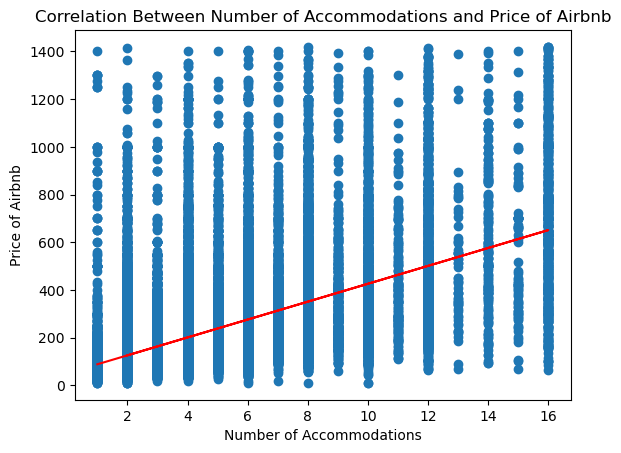

In [34]:
# Linear regression model.
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_combined['accommodates'], df_combined['price'])
regress_values = df_combined['accommodates'] * slope + intercept
plt.scatter(df_combined['accommodates'], df_combined['price'])
plt.plot(df_combined['accommodates'], regress_values, "r-")
plt.xlabel("Number of Accommodations")
plt.ylabel("Price of Airbnb")
plt.title("Correlation Between Number of Accommodations and Price of Airbnb")
plt.show()

In [35]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['host_total_listings_count'], df_combined['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.15


In [36]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['bathrooms_text'], df_combined['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.52


In [37]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['bedrooms'], df_combined['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.54


In [38]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['amenities_count'], df_combined['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.21


In [39]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['minimum_nights'], df_combined['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.11


In [40]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['maximum_nights'], df_combined['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.0


In [41]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['number_of_reviews'], df_combined['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.05


In [42]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['host_is_superhost'], df_combined['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.05


In [43]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['host_identity_verified'], df_combined['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.03


In [44]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['instant_bookable'], df_combined['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.13


In [45]:
# Correlation coefficient.
correlation = st.pearsonr(df_rates['host_response_rate'], df_rates['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.01


In [46]:
# Correlation coefficient.
correlation = st.pearsonr(df_rates['host_acceptance_rate'], df_rates['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.06


In [47]:
df_reviews.columns

Index(['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'price', 'revenue_365', 'revenue_pp_365'],
      dtype='object')

In [48]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_rating'], df_reviews['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.08


In [49]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_accuracy'], df_reviews['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.05


In [50]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_cleanliness'], df_reviews['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.1


In [51]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_checkin'], df_reviews['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.04


In [52]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_communication'], df_reviews['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.04


In [53]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_location'], df_reviews['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.11


In [54]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_value'], df_reviews['price'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.02


# Calculating Correlations with Revenue_pp

In [55]:
df_combined.columns

Index(['host_since', 'host_is_superhost', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'instant_bookable', 'revenue_365',
       'revenue_pp_365', 'amenities_count'],
      dtype='object')

In [56]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['accommodates'], df_combined['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.21


In [57]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['host_total_listings_count'], df_combined['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.0


In [58]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['host_identity_verified'], df_combined['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.03


In [59]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['bathrooms_text'], df_combined['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.1


In [60]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['bedrooms'], df_combined['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.14


In [61]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['beds'], df_combined['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.16


In [62]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['amenities_count'], df_combined['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.13


In [63]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['minimum_nights'], df_combined['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.06


In [64]:
# Correlation coefficient.
correlation = st.pearsonr(df_combined['availability_365'], df_combined['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.54


In [65]:
# Correlation coefficient.
correlation = st.pearsonr(df_rates['host_response_rate'], df_rates['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.01


In [66]:
# Correlation coefficient.
correlation = st.pearsonr(df_rates['host_acceptance_rate'], df_rates['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.07


In [67]:
df_reviews.columns

Index(['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'price', 'revenue_365', 'revenue_pp_365'],
      dtype='object')

In [68]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_rating'], df_reviews['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.06


In [69]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_accuracy'], df_reviews['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.05


In [70]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_cleanliness'], df_reviews['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.02


In [71]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_checkin'], df_reviews['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.03


In [72]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews[ 'review_scores_communication'], df_reviews['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.06


In [73]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_location'], df_reviews['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.11


In [74]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_value'], df_reviews['revenue_pp_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.05


# Calculating Correlation between Availability and Reviews

In [32]:
df_reviews.columns

Index(['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'price', 'revenue_365', 'revenue_pp_365',
       'availability_365', 'number_of_reviews'],
      dtype='object')

In [33]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_rating'], df_reviews['availability_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.04


In [34]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_accuracy'], df_reviews['availability_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.06


In [35]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_cleanliness'], df_reviews['availability_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.03


In [36]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_checkin'], df_reviews['availability_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.05


In [37]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_communication'], df_reviews['availability_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.08


In [38]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_location'], df_reviews['availability_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.06


In [39]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['review_scores_value'], df_reviews['availability_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: -0.09


In [40]:
# Correlation coefficient.
correlation = st.pearsonr(df_reviews['number_of_reviews'], df_reviews['availability_365'])
print(f"Correlation: {round(correlation[0],2)}")

Correlation: 0.02
